Import library

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Introduction Variables

In [ ]:
a = 5

In [ ]:
b = 6

In [ ]:
print(a+b)

11


In [ ]:
print(a*b)

30


In [ ]:
c = 'this is string'

In [ ]:
print(c)

this is string


# Introduction to Looping

In [ ]:
print(a+0)
print(a+1)
print(a+2)

5
6
7


In [ ]:
for i in range(10):
  print (a+i)

5
6
7
8
9
10
11
12
13
14


# Read Data and Cleaning Data

In [ ]:
# how to read data in google sheet
sheet_url = 'https://docs.google.com/spreadsheets/d/1N2p5pBmJxM2MLIIsxWDlEpa2moG-sXtw/edit#gid=187419757' # link editable dokumen (kemarin sempet ga diubah privacy jadi gabisa diconvert dan error di pd.read)
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=') # convert editable spreadsheet csv
print(sheet_url_trf)

df = pd.read_csv(sheet_url_trf) # df=dataframe, pd.read_csv= perintah baca file csv pake panda
df.head() # nampilin tabel 5 baris teratas

https://docs.google.com/spreadsheets/d/1N2p5pBmJxM2MLIIsxWDlEpa2moG-sXtw/export?format=csv&gid=187419757


,Date,Payment,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity
0,1/5/2019,Ewallet,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7
1,3/8/2019,Cash,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5
2,3/3/2019,Credit card,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7
3,1/27/2019,Ewallet,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8
4,2/8/2019,Ewallet,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7


In [ ]:
# info tabel (info kolom, baris, dll)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1000 non-null   object 
 1   Payment        1000 non-null   object 
 2   Invoice ID     1000 non-null   object 
 3   Branch         1000 non-null   object 
 4   City           1000 non-null   object 
 5   Customer type  1000 non-null   object 
 6   Gender         1000 non-null   object 
 7   Product line   1000 non-null   object 
 8   Unit price     1000 non-null   float64
 9   Quantity       1000 non-null   int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 78.2+ KB


In [ ]:
# 1000 non-null = 1000 data dan semuanya terisi (gaada yg kosong)
# type object = text/string
# float64 = angka, min. 1 data ada desimalnya
# int 64 (integer) = angka, bil bulat

# lihat kolom data masih berupa string/object, harusnya datetime

df.columns #nampilin list columns, untuk ubah data tanpa nulis satu2 nama column

Index(['Date', 'Payment', 'Invoice ID', 'Branch', 'City', 'Customer type',
       'Gender', 'Product line', 'Unit price', 'Quantity'],
      dtype='object')

In [ ]:
# change type date
df_clean = df.copy() # ngecopy data df biar ada back up sbg frame asli (opsional)
df_clean['Date'] = pd.to_datetime(df_clean['Date']) # function pd.to_datetime untuk ubah text jadi tanggal
df_clean['Revenue'] = df_clean['Unit price'] * df_clean['Quantity']

print(df_clean.info())
df_clean.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           1000 non-null   datetime64[ns]
 1   Payment        1000 non-null   object        
 2   Invoice ID     1000 non-null   object        
 3   Branch         1000 non-null   object        
 4   City           1000 non-null   object        
 5   Customer type  1000 non-null   object        
 6   Gender         1000 non-null   object        
 7   Product line   1000 non-null   object        
 8   Unit price     1000 non-null   float64       
 9   Quantity       1000 non-null   int64         
 10  Revenue        1000 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 86.1+ KB
None


,Date,Payment,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Revenue
0,2019-01-05,Ewallet,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,522.83
1,2019-03-08,Cash,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,76.40
2,2019-03-03,Credit card,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,324.31
3,2019-01-27,Ewallet,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,465.76
4,2019-02-08,Ewallet,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,604.17


In [ ]:
#check typo

df_clean['Gender'].value_counts()

Female    498
Male      490
male        9
female      2
fml         1
Name: Gender, dtype: int64

In [ ]:
for col_name in ['Payment', 'Branch', 'City', 'Customer type', 'Gender', 'Product line'] :
  print(df_clean[col_name].value_counts(), '\n') # \n untuk tambah enter/baris baru tiap habis itung value counts

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64 

A    340
B    332
C    328
Name: Branch, dtype: int64 

Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64 

Member    501
Normal    499
Name: Customer type, dtype: int64 

Female    498
Male      490
male        9
female      2
fml         1
Name: Gender, dtype: int64 

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64 



In [ ]:
# replace
dict_typo = {'male' : 'Male',
             'female' : 'Female',
             'fml' : 'Female'}

df_replaced = df_clean.replace(dict_typo)
df_replaced.head(7) # kalo () doang 5 baris teratas, (n) n baris teratas

,Date,Payment,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Revenue
0,2019-01-05,Ewallet,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,522.83
1,2019-03-08,Cash,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,76.40
2,2019-03-03,Credit card,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,324.31
3,2019-01-27,Ewallet,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,465.76
4,2019-02-08,Ewallet,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,604.17
5,2019-03-25,Ewallet,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,597.73
6,2019-02-25,Ewallet,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,413.04


In [ ]:
df_replaced['Gender'].value_counts()

Female    501
Male      499
Name: Gender, dtype: int64

In [ ]:
# check duplicate data
df_replaced['Invoice ID'].duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Name: Invoice ID, Length: 1000, dtype: bool

In [ ]:
# biar ga true-false
df_replaced['Invoice ID'].duplicated().sum() 

0

# EDA

## Daily trend overall

In [ ]:
# aggregat daily trend revenue
agg_daily = df_replaced.groupby('Date', as_index=False)['Revenue','Quantity'].sum()
agg_daily.head()

<ipython-input-26-aa4efe383c17>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  agg_daily = df_replaced.groupby('Date', as_index=False)['Revenue','Quantity'].sum()


,Date,Revenue,Quantity
0,2019-01-01,4519.22,81
1,2019-01-02,1852.86,48
2,2019-01-03,1979.17,37
3,2019-01-04,1546.37,32
4,2019-01-05,3368.27,55


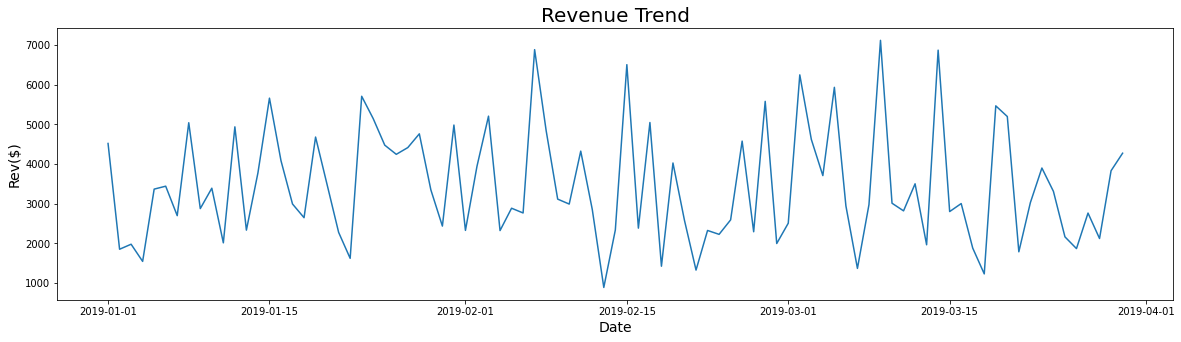

In [ ]:
# pake matplotlib

plt.rcParams['figure.figsize'] = (20,5)

plt.plot('Date', 'Revenue', data = agg_daily)
plt.title('Revenue Trend', fontsize=20)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Rev($)', fontsize=14)
plt.show()

Revenue of our data has seasonality

<Axes: xlabel='Date', ylabel='Quantity'>

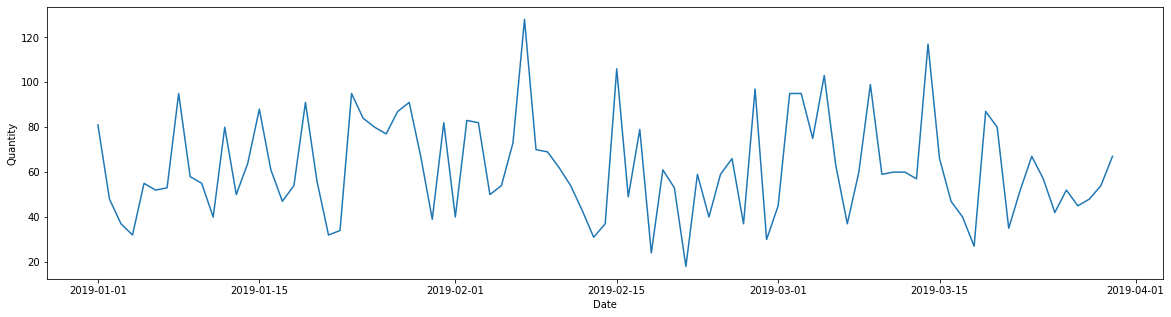

In [ ]:
# pake seaborn
sns.lineplot(data = agg_daily, x = 'Date', y = 'Quantity')

## By Payment

In [ ]:
#hitung total revenue transaksi per tipe payment
df_replaced.groupby('Payment', as_index=False).sum()

,Payment,Unit price,Quantity,Revenue
0,Cash,19525.09,1896,106863.40
1,Credit card,16916.68,1722,95968.64
2,Ewallet,19230.36,1892,104755.34


In [ ]:
# hitung total revenue dan jumlah transaksi (dibedain dari invoice id) per tipe payment
agg_payment= df_replaced.groupby('Payment', as_index=False).agg({'Revenue': 'sum','Invoice ID' : 'nunique'})
agg_payment

,Payment,Revenue,Invoice ID
0,Cash,106863.40,344
1,Credit card,95968.64,311
2,Ewallet,104755.34,345


<Axes: xlabel='Payment', ylabel='Revenue'>

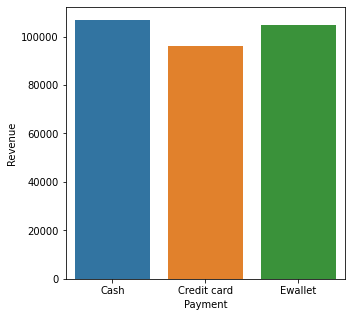

In [ ]:
# bar chart pakai seaborn
plt.rcParams['figure.figsize'] = (5,5)
sns.barplot(data = agg_payment, x = 'Payment', y = 'Revenue')

<Axes: xlabel='Payment', ylabel='Revenue'>

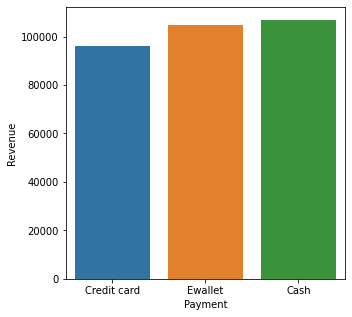

In [ ]:
# bar chart kalo datanya mau disorting (ascending)
plt.rcParams['figure.figsize'] = (5,5)
sns.barplot(data = agg_payment.sort_values('Revenue'), x = 'Payment', y = 'Revenue')

<Axes: xlabel='Payment', ylabel='Revenue'>

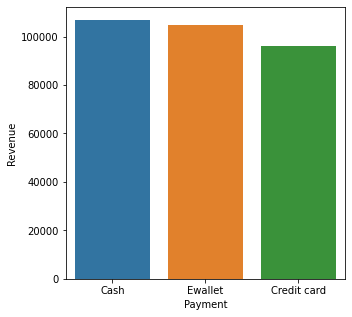

In [ ]:
# bar chart kalo datanya mau disorting (descending)
plt.rcParams['figure.figsize'] = (5,5)
sns.barplot(data = agg_payment.sort_values('Revenue',ascending=False), x = 'Payment', y = 'Revenue')

Highest revenue came from cash payment